In [2]:
from models.LSTM import LSTMModel
from utils.dataset import TimeSeriesDataset
import torch
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
seq_length = 7
hidden_size = 32
num_layers = 2
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
df = pd.read_csv("data/clean.csv")
df['dt'] = pd.to_datetime(df['dt'])
df.set_index('dt', inplace=True)
dataset = TimeSeriesDataset(df, seq_length, target_col='Global_active_power')

MSE over 200 samples: 0.047417
MAE over 200 samples: 0.128444


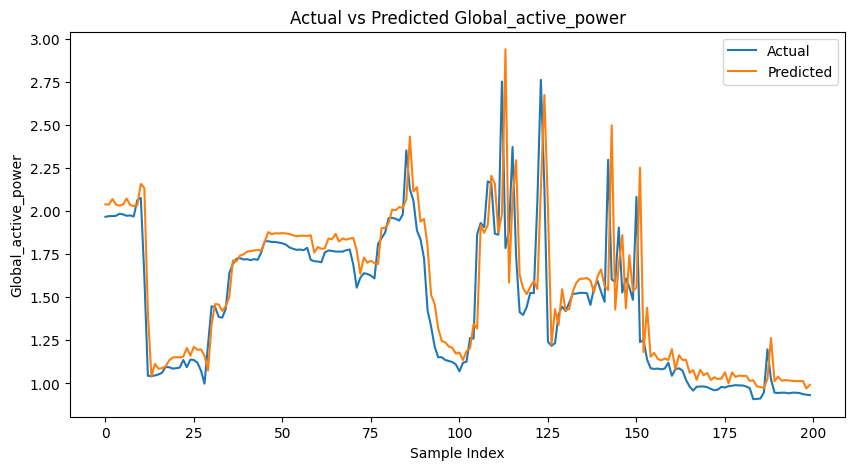

In [4]:
loaded_model = LSTMModel(input_size=df.shape[1], hidden_size=hidden_size, num_layers=num_layers)
loaded_model.load_state_dict(torch.load('./weights/lstm_model_32.pth', map_location=device))
loaded_model.to(device)
loaded_model.eval()

# Dự đoán 200 mẫu và tính MSE, MAE
n_samples = 200
y_true = []
y_pred = []
with torch.no_grad():
    for idx in range(len(dataset) - n_samples, len(dataset)):
        x, y = dataset[idx]
        x = x.unsqueeze(0).to(device)
        pred = loaded_model(x)
        y_true.append(y.item())
        y_pred.append(pred.item())

y_true = np.array(y_true)
y_pred = np.array(y_pred)
mse = np.mean((y_true - y_pred)**2)
mae = np.mean(np.abs(y_true - y_pred))
print(f"MSE over {n_samples} samples: {mse:.6f}")
print(f"MAE over {n_samples} samples: {mae:.6f}")

# Vẽ đồ thị so sánh
plt.figure(figsize=(10, 5))
plt.plot(range(n_samples), y_true, label='Actual')
plt.plot(range(n_samples), y_pred, label='Predicted')
plt.title('Actual vs Predicted Global_active_power')
plt.xlabel('Sample Index')
plt.ylabel('Global_active_power')
plt.legend()
plt.show()